In [54]:
import pandas as pd
import numpy as np
data=pd.read_csv('fortune500.csv')
data

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,168828.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,137137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Exxon Corporation,3,1996,Petroleum Refining,NaN,TX,NaN,NaN,110009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,NaN,AR,NaN,NaN,93627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT&T Corp.,5,1996,Telecommunications,NaN,NY,NaN,NaN,79609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,Financials,NY,New York,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
13936,Equinix,497,2023,Real Estate,Financials,CA,Redwood City,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
13937,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,Hartsville,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
13938,ServiceNow,499,2023,Computer Software,Technology,CA,Santa Clara,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no


In [79]:
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data.columns

Index(['name', 'rank', 'year', 'industry', 'sector', 'headquarters_state',
       'headquarters_city', 'market_value_mil', 'revenue_mil', 'profit_mil',
       'asset_mil', 'employees', 'founder_is_ceo', 'female_ceo',
       'newcomer_to_fortune_500', 'global_500'],
      dtype='object')

In [57]:
data=data[['name','rank','year','industry','revenue_mil', 'profit_mil','employees','global_500']]

In [61]:
data.head(10)

,name,rank,year,industry,revenue_mil,profit_mil,employees,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,168828.6,NaN,NaN,<NA>
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,137137.0,NaN,NaN,<NA>
2,Exxon Corporation,3,1996,Petroleum Refining,110009.0,NaN,NaN,<NA>
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,93627.0,NaN,NaN,<NA>
4,AT&T Corp.,5,1996,Telecommunications,79609.0,NaN,NaN,<NA>
5,International Business Machines Corporation,6,1996,"Computers, Office Equipment",71940.0,NaN,NaN,<NA>
6,General Electric Company,7,1996,"Electronics, Electrical Equipment",70028.0,NaN,NaN,<NA>
7,Mobil Corporation,8,1996,Petroleum Refining,66724.0,NaN,NaN,<NA>
8,Chrysler Corporation,9,1996,Motor Vehicles & Parts,53195.0,NaN,NaN,<NA>
9,Philip Morris Companies,10,1996,Tobacco,53139.0,NaN,NaN,<NA>


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         13940 non-null  object 
 1   rank         13940 non-null  int64  
 2   year         13940 non-null  int64  
 3   industry     13940 non-null  object 
 4   revenue_mil  13940 non-null  float64
 5   profit_mil   5497 non-null   float64
 6   employees    4500 non-null   float64
 7   global_500   4000 non-null   string 
dtypes: float64(3), int64(2), object(2), string(1)
memory usage: 871.4+ KB


In [63]:
data=data.tail(500)

In [64]:
data

,name,rank,year,industry,revenue_mil,profit_mil,employees,global_500
13440,Walmart,1,2023,General Merchandisers,611289.0,11680.0,2100000.0,yes
13441,Amazon,2,2023,Internet Services and Retailing,513983.0,2722.0,1541000.0,yes
13442,Exxon Mobil,3,2023,Petroleum Refining,413680.0,55740.0,62000.0,yes
13443,Apple,4,2023,"Computers, Office Equipment",394328.0,99803.0,164000.0,yes
13444,UnitedHealth Group,5,2023,Health Care: Insurance and Managed Care,324162.0,20120.0,400000.0,yes
...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,7273.0,841.0,4150.0,no
13936,Equinix,497,2023,Real Estate,7263.0,704.0,12097.0,no
13937,Sonoco Products,498,2023,"Packaging, Containers",7251.0,466.0,22000.0,no
13938,ServiceNow,499,2023,Computer Software,7245.0,325.0,20433.0,no


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 13440 to 13939
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         500 non-null    object 
 1   rank         500 non-null    int64  
 2   year         500 non-null    int64  
 3   industry     500 non-null    object 
 4   revenue_mil  500 non-null    float64
 5   profit_mil   500 non-null    float64
 6   employees    500 non-null    float64
 7   global_500   500 non-null    string 
dtypes: float64(3), int64(2), object(2), string(1)
memory usage: 31.4+ KB


In [66]:
data.industry.nunique()

71

In [67]:
data.isnull().sum()

name           0
rank           0
year           0
industry       0
revenue_mil    0
profit_mil     0
employees      0
global_500     0
dtype: int64

In [68]:
data.describe()

,rank,year,revenue_mil,profit_mil,employees
count,500.00000,500.0,500.000000,500.00000,5.000000e+02
mean,250.49800,2023.0,36288.544000,3612.17800,6.081496e+04
std,144.48211,0.0,60852.543913,7800.21751,1.357973e+05
min,1.00000,2023.0,7238.000000,5.00000,3.810000e+02
25%,125.75000,2023.0,10652.000000,692.75000,1.260175e+04
50%,250.50000,2023.0,16523.500000,1427.50000,2.665800e+04
75%,375.25000,2023.0,32043.000000,3328.00000,6.005000e+04
max,500.00000,2023.0,611289.000000,99803.00000,2.100000e+06


In [28]:
data.revenue_mil.mean()

36288.544

In [29]:
data.revenue_mil.mode()

0     9643.0
1    10580.0
2    14410.0
3    17737.0
Name: revenue_mil, dtype: float64

In [30]:
data.revenue_mil.median()

16523.5

In [74]:
data.revenue_mil.min()

7238.0

In [75]:
data.revenue_mil.max()

611289.0

In [76]:
data.revenue_mil.var()

3703032100.693451

In [77]:
data.revenue_mil.std()

60852.543913081

In [81]:
data.revenue_mil.quantile(0.25)

10652.0

In [82]:
data.revenue_mil.quantile(0.5)

16523.5

In [32]:
data.median(numeric_only=True)

rank             250.5
year            2023.0
revenue_mil    16523.5
profit_mil      1427.5
employees      26658.0
dtype: float64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 13440 to 13939
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         500 non-null    object 
 1   rank         500 non-null    int64  
 2   year         500 non-null    int64  
 3   industry     500 non-null    object 
 4   revenue_mil  500 non-null    float64
 5   profit_mil   500 non-null    float64
 6   employees    500 non-null    float64
 7   global_500   500 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 31.4+ KB


In [69]:
data['global_500'].astype('string')

13440    yes
13441    yes
13442    yes
13443    yes
13444    yes
        ... 
13935     no
13936     no
13937     no
13938     no
13939     no
Name: global_500, Length: 500, dtype: string

In [70]:
data['global_500']

13440    yes
13441    yes
13442    yes
13443    yes
13444    yes
        ... 
13935     no
13936     no
13937     no
13938     no
13939     no
Name: global_500, Length: 500, dtype: string

In [71]:
label=preprocessing.LabelEncoder()

In [72]:
data['global_500']=label.fit_transform(data['global_500'])

In [73]:
data

,name,rank,year,industry,revenue_mil,profit_mil,employees,global_500
13440,Walmart,1,2023,General Merchandisers,611289.0,11680.0,2100000.0,1
13441,Amazon,2,2023,Internet Services and Retailing,513983.0,2722.0,1541000.0,1
13442,Exxon Mobil,3,2023,Petroleum Refining,413680.0,55740.0,62000.0,1
13443,Apple,4,2023,"Computers, Office Equipment",394328.0,99803.0,164000.0,1
13444,UnitedHealth Group,5,2023,Health Care: Insurance and Managed Care,324162.0,20120.0,400000.0,1
...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,7273.0,841.0,4150.0,0
13936,Equinix,497,2023,Real Estate,7263.0,704.0,12097.0,0
13937,Sonoco Products,498,2023,"Packaging, Containers",7251.0,466.0,22000.0,0
13938,ServiceNow,499,2023,Computer Software,7245.0,325.0,20433.0,0


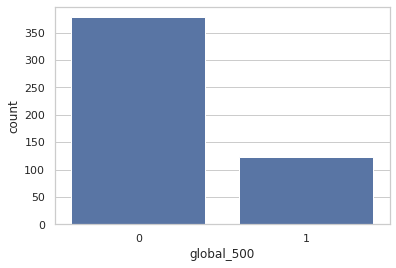

In [80]:
sns.set(style="whitegrid")
ax = sns.countplot(x='global_500', data=data)

[]

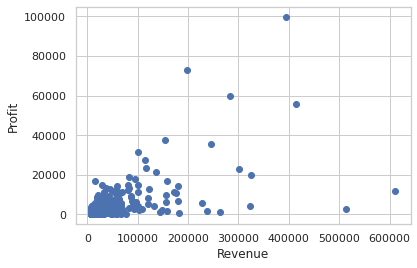

In [86]:
plt.scatter(data['revenue_mil'],data['profit_mil'])
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.plot()

[]

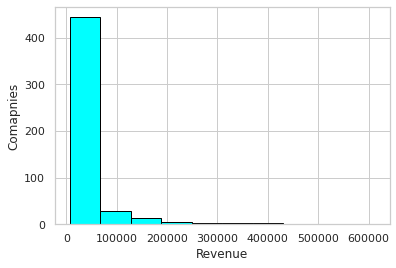

In [96]:
plt.hist(data['revenue_mil'], bins=10, color=['cyan'], edgecolor='black')
plt.xlabel('Revenue')
plt.ylabel('Comapnies')
plt.plot()